In [1]:
from pathlib import Path
import requests
from itertools import chain
import pickle
import gzip
from matplotlib import pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
import math

import RNN_model

In [2]:
# number of symbols to recall
k = 5
# waiting time before recall
t = 10

In [3]:
# Generates training and testing data for copy task
# k: number of symbols to recall at begining of input
# t: number of random symbols before recall
# batch_size: batch size
# n_batches: number of batches. Total number of trials = n_batches x batch_size
# shuffle: True or False. Whether to shuffle data each time the dataloader is used
# return: pytorch DataLoader with x and y tensors of shape #TODO
def generate_data(k,t,batch_size,n_batches,shuffle):
    x = torch.rand(n_batches*batch_size,k+t,1)
    y = x[:,:k].reshape(n_batches*batch_size,k)
    ds = TensorDataset(x, y)
    dl = DataLoader(ds,batch_size=batch_size,shuffle=shuffle)
    return dl

In [4]:
train_dl = generate_data(k,t,200,300,False)
test_dl = generate_data(k,t,500,1,True)

In [5]:
n_steps = k+t
n_inputs = 1
n_neurons = 100
n_outputs = k
loss_func = F.mse_loss
opt_func = optim.SGD
lr = 0.01

model = RNN_model.RNN_target_value(n_steps, n_inputs, n_neurons, n_outputs, loss_func, opt_func, lr)

0
1
2


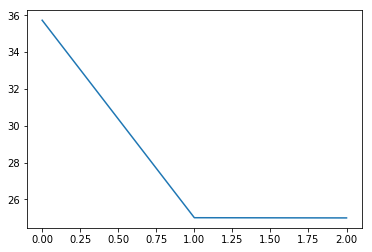

In [10]:
loss_array = model.fit(3,train_dl)

plt.plot(loss_array)

In [14]:
model.accuracy(test_dl,1/3*np.sqrt(k))

tensor(0.8160)